In [40]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data

### build an list to store run information

In [41]:
run_info =[]
runlist = 'runlist/LED_20240821_20240826_h5py_runlist'
runs = analysis_data.load_runlist_to_numpy(runlist)
print(runs)
len(runs)

['outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_11ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_12ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_13ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_14ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_15ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_15.5ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_16ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_16.5ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_17ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_15ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_14.5ns_400

25

### load data and plots all figures
### store the run info to DataFrames

In [ ]:
for file in runs:
    file_date = file.split('LED_')[0].split('readout_')[2]
    led_config = file.split('LED_')[1].split('_400')[0]
    file_tag = file_date + led_config
    #print(file_tag)
    if file_tag == '20240821_1.7V_11ns':
        continue
    df = pd.read_hdf(file, key='winfo')
    area_ch0 = df.Area[df.Ch==0].astype(np.float64).to_numpy()
    area_ch1 = df.Area_fixrange[df.Ch==1].astype(np.float64).to_numpy()
    area_ch2 = df.Area_fixrange[df.Ch==2].astype(np.float64).to_numpy()
   
    #df.head()
    ratio = area_ch0/area_ch1
    mean_ch0 = np.mean(area_ch0)
    std_ch0 = np.std(area_ch0)
    nbins_ch0 = np.round(np.max(area_ch0)-np.min(area_ch0)).astype(int)
    left_edge_ch0 = np.min(area_ch0)
    right_edge_ch0 = np.max(area_ch0)
    amplitude_ch0 = len(area_ch0)
    
    mean_ch1 = np.mean(area_ch1)
    std_ch1 = np.std(area_ch1)
    nbins_ch1 = np.round(np.max(area_ch1)-np.min(area_ch1)).astype(int)
    amplitude_ch1 = len(area_ch1)
    left_edge_ch1 = np.min(area_ch1)
    right_edge_ch1 = np.max(area_ch1)
    
    #ch2_area_pe = -area_ch2
    mean_ch2 = np.mean(- area_ch2)
    std_ch2 = np.std(- area_ch2)
    nbins_ch2 = 50 # np.round(np.max( -area_ch2) - np.min( -area_ch2) ).astype(int)
    left_edge_ch2 = np.min( - area_ch2)
    right_edge_ch2 = np.max(- area_ch2)
    amplitude_ch2 = len(- area_ch2)
    #if nbins_ch2 < 10:
    #    nbins_ch2 = 10*nbins_ch2
    
    #gain_ratio = area_ch0/(-area_ch2)
    
    #mean_gratio = np.mean(gain_ratio)
    #std_gratio = np.std(gain_ratio)
    #nbins_gratio = (np.round( np.abs( np.max(gain_ratio)-np.min(gain_ratio) ))).astype(int)
    
    #if nbins_gratio < 0:
    #    nbins_gratio = 100
        
    #left_edge_gratio = np.min(gain_ratio)
    #right_edge_gratio = np.max(gain_ratio)
    #amplitude_gratio = len(gain_ratio)
    
    if nbins_ch0 > 300:
        nbins_ch0 = 200
        left_edge_ch0 = mean_ch0 -100
        right_edge_ch0 = mean_ch0 + 100
    if nbins_ch1 > 200:
        nbins_ch1 = 200
        left_edge_ch1 = mean_ch1 -100
        right_edge_ch1 = mean_ch1 + 100
    
    hist, bins_edges = np.histogram(area_ch0, bins= nbins_ch0, range=(left_edge_ch0, right_edge_ch0))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch0, mean_ch0,  std_ch0])
    x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch0 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch0 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch0 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch0_area_pe_mu = popt[1]
    Ch0_area_pe_sigma = popt[2]
    
    hist_, bins__edges_ = np.histogram(area_ch1, bins= nbins_ch1, range=(left_edge_ch1, right_edge_ch1))
    bins_ = (bins__edges_[:-1] + bins__edges_[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins_, hist_, p0=[1.E3, mean_ch1,  std_ch1])
    x_fit = np.linspace(np.min(bins_), np.max(bins_), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist(area_ch1, bins=nbins_ch1, range=(left_edge_ch1, right_edge_ch1),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch1 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch1 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch1_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch1 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch1_area_pe_mu = popt[1]
    Ch1_area_pe_sigma = popt[2]
    
    #hist, bins_edges = np.histogram(area_ch0, bins= nbins_ch0, range=(left_edge_ch0, right_edge_ch0))
    hist, bins_edges = np.histogram( -area_ch2, bins= nbins_ch2, range=(left_edge_ch2, right_edge_ch2))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch2, mean_ch2,  std_ch2])
    x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist( -area_ch2, bins=nbins_ch2, range=(left_edge_ch2, right_edge_ch2),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch2 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch2 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./res/LED_{}_Ch2_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch2 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch2_area_pe_mu = popt[1]
    Ch2_area_pe_sigma = popt[2]
    
    
    
    plt.hist2d(area_ch0, area_ch1, bins=[
        np.linspace(left_edge_ch0, right_edge_ch0, nbins_ch0),
        np.linspace(left_edge_ch1, right_edge_ch1, nbins_ch1)
    ] , norm=LogNorm(), cmap='jet', label='Ch1_vs_Ch0_area')
    plt.colorbar()
    plt.xlabel('Ch0 Area[ADC]')
    plt.ylabel('Ch1 Area[ADC]')
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_{:.2f}_PE_Ch1_{:.2f}_PE.png'.format(file_tag, Ch0_area_pe_mu, Ch1_area_pe_mu),dpi=300)
    plt.show()
    plt.cla()
    

    
    plt.hist2d(area_ch0, ratio, bins=[
        np.linspace(left_edge_ch0,right_edge_ch0, nbins_ch0),
        np.linspace(0, 250, 200)
    ] , norm=LogNorm(), cmap='jet', label='Ch0_Ch1_ratio_vs_Ch0_area')
    plt.colorbar()
    #plt.yscale('log')
    plt.xlabel('Ch0 Area[PE]')
    plt.ylabel('Ch0/Ch1 Ratio')
    plt.title(r'LED {} Ch0 Area vs Ch0/Ch1 Ratio'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_Area_vs_Ch0_Ch1_Ratio.png'.format(file_tag),dpi=300)
    plt.show()
    plt.cla()
    
    hist, bins_edges =np.histogram(ratio, bins=200, range=(0, 250))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.landau_fit, bins, hist , p0=[30, 10, 1.4e4])
    
    x_fit = np.linspace(0, 250, 1000)
    y_fit = analysis_data.landau_fit(x_fit, popt[0], popt[1],popt[2])
    #fig, ax = plt.subplots()
    plt.hist(ratio, bins=200, range=(0, 250), density=False, alpha=0.5, label='Ratio')
    plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))
    plt.xlabel('Ch0/CH1 Ratio')
    plt.ylabel('PDF')
    plt.title('Landau Distribution')
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_CH1_Ratio_fit_mu_{:.2f}_sigma_{:.2f}.png'.format(file_tag,popt[0],popt[1] ),dpi=300)
    plt.show()
    print(r'Ratio Fitting Result: mu= {:.2f}, sigma= {:.2f}'.format(popt[0],popt[1]))
    Ratio_fit_mu = popt[0]
    Ratio_fit_sigma = popt[1]
       
    run_info.append({
        'Ch0_Area_mu': Ch0_area_pe_mu,
        'Ch0_Area_sigma': Ch0_area_pe_sigma,
        'Ch1_Area_mu': Ch1_area_pe_mu,
        'Ch1_Area_sigma': Ch1_area_pe_sigma,
        'Ch2_Area_mu': Ch2_area_pe_mu,
        'Ch2_Area_sigma': Ch2_area_pe_sigma,
        'Ratio_fit_mu': Ratio_fit_mu,
        'Ratio_fit_sigma': Ratio_fit_sigma,
        #'Gain_ratio_fit_mu': gain_ratio_fit_mu,
        #'Gain_ratio_fit_sigma': gain_ratio_fit_sigma,
        'file_tag': file_tag            
    })

### store and save runifo to h5py file

In [54]:

import process_data
#path_save = 'outnpy/LED_20240821_20240826_runinfo.h5py'
df = pd.DataFrame(run_info)
#process_data.write_to_hdf5(df, path_save)


In [ ]:
df[:30]

In [56]:
filter_0 = df.file_tag != '20240826_1.7V_17.5ns'
filter_1 = df.file_tag != '20240826_1.7V_18ns'
filter_2 = df.file_tag != '20240821_1.7V_15ns'
filter_3 = df.file_tag != '20240821_1.7V_14ns'
filter_4 = df.file_tag != '20240821_1.7V_13ns'
filter_5 = df.file_tag != '20240821_1.7V_12ns'
filter_6 = df.file_tag != '20240821_1.7V_11ns'
dfs = df[ filter_0  & filter_1 & filter_2 & filter_3 & filter_4  & filter_5 & filter_6]

In [57]:
len(dfs)

18

In [58]:
def exp_fit(x,A_0,A,x_0,alpha):
    return A_0 - (A * np.exp(-(x-x_0)/alpha))
popt, pcov = curve_fit(exp_fit,dfs.Ch0_Area_mu,dfs.Ratio_fit_mu,p0=(40,40,10,150))
fit_x = np.linspace(0,1000, 1000)
fit_y = exp_fit(fit_x,*popt)


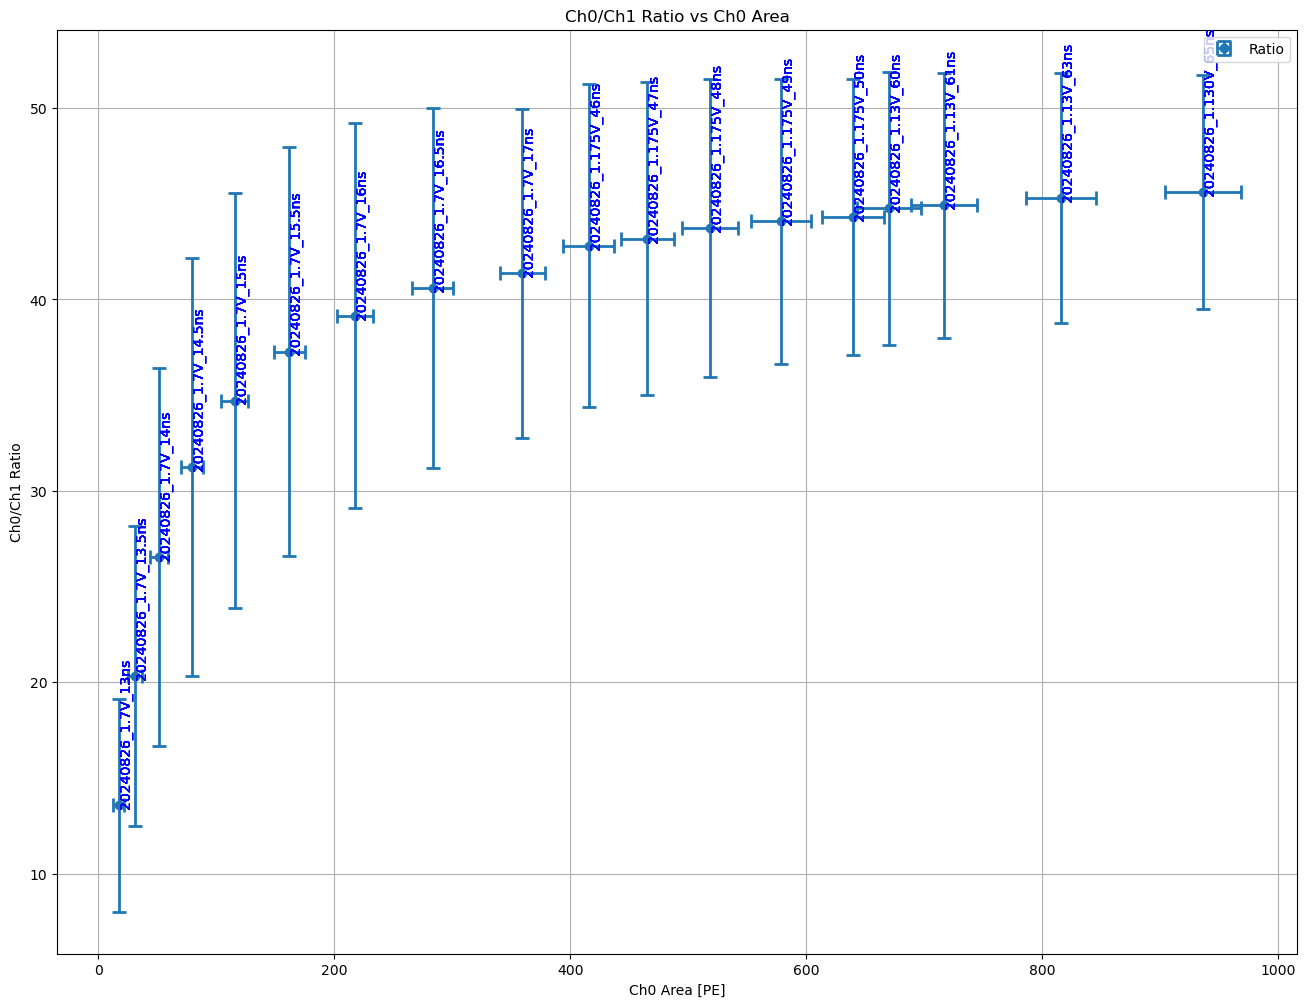

In [59]:
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, dfs.Ratio_fit_mu, xerr=dfs.Ch0_Area_sigma, yerr=dfs.Ratio_fit_sigma, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Ch0/Ch1 Ratio')
ax.set_title('Ch0/Ch1 Ratio vs Ch0 Area')
#plt.plot(fit_x,fit_y,label='Fit')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
#plt.savefig(r'./figs/Ch0_CH1_Ratio_vs_Ch0_Area_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [ ]:
ratio = dfs.Ch0_Area_mu / dfs.Ch1_Area_mu 

ratio_err = np.abs(1/dfs.Ch1_Area_mu * dfs.Ch0_Area_sigma  + dfs.Ch0_Area_mu/ dfs.Ch1_Area_mu**2 * dfs.Ch1_Area_sigma)

gain_ratio = dfs.Ch0_Area_mu / dfs.Ch2_Area_mu

gain_ratio_err = np.abs(1/dfs.Ch2_Area_mu * dfs.Ch0_Area_sigma  + dfs.Ch0_Area_mu/dfs.Ch2_Area_mu**2 * dfs.Ch2_Area_sigma)

                     
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, ratio, xerr=dfs.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Ch0/Ch1 Ratio')
ax.set_title('Ch0/Ch1 Ratio vs Ch0 Area')
#plt.plot(fit_x,fit_y,label='Fit')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-60, 200)
#plt.savefig(r'./figs/Ch0_lv2414_CH1_lv2415_Ratio_vs_lv2414_anode_area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, gain_ratio, xerr=dfs.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Gain Ratio')
ax.set_title('Gain Ratio From anode to dynode vs Ch0 Area')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
#ax.set_ylim(-60, 200)
#plt.savefig(r'./figs/LV2414_anode_to_dynode_gain_ratio_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [71]:
filter_area = df.Ch0_Area_mu > 400
filter_file = filter_0 & filter_1 & filter_2 & filter_3 & filter_4 & filter_5
df_larger_area = df[filter_area & filter_file]
path = 'outnpy//df_larger_400pe_20240826.h5py'
process_data.write_to_hdf5(df_larger_area, path)

h5 Write Time: 0.01 s 
h5 File Size: 1.03 MB
Save to outnpy//df_larger_400pe_20240826.h5py


(0.008655309677124023, 1074895)

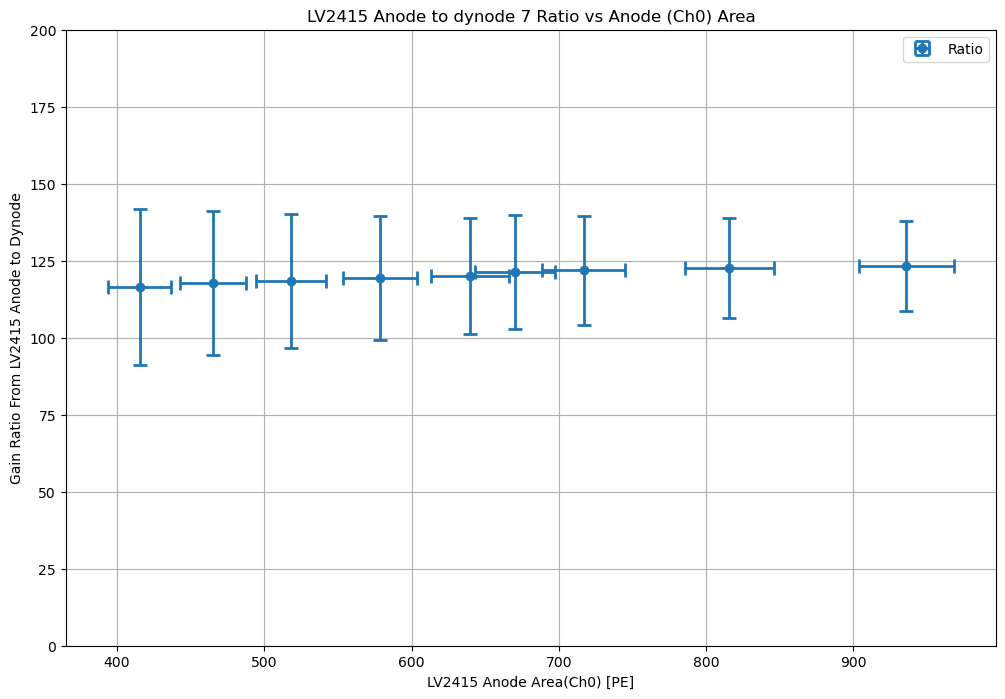

In [65]:
ratio = df_larger_area.Ch0_Area_mu / df_larger_area.Ch1_Area_mu 

ratio_err = np.abs(1/df_larger_area.Ch1_Area_mu * df_larger_area.Ch0_Area_sigma  + df_larger_area.Ch0_Area_mu/ df_larger_area.Ch1_Area_mu**2 * df_larger_area.Ch1_Area_sigma)

gain_ratio = df_larger_area.Ch0_Area_mu / df_larger_area.Ch2_Area_mu

gain_ratio_err = np.abs(1/df_larger_area.Ch2_Area_mu * df_larger_area.Ch0_Area_sigma  + df_larger_area.Ch0_Area_mu/df_larger_area.Ch2_Area_mu**2 * df_larger_area.Ch2_Area_sigma)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area.Ch0_Area_mu, gain_ratio, xerr=df_larger_area.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
#plt.plot(fit_x,fit_y,label='Fit')
#for index, row in dfs.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(0, 200)
#plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_vs_anode_Area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

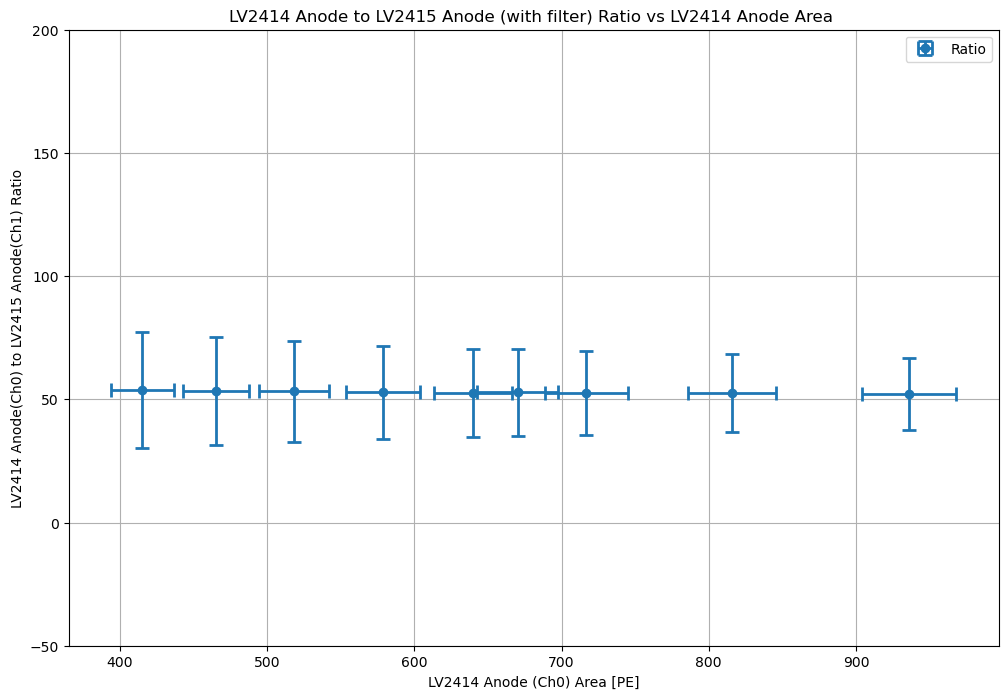

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area.Ch0_Area_mu, ratio, xerr=df_larger_area.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('LV2414 Anode (Ch0) Area [PE]')
ax.set_ylabel('LV2414 Anode(Ch0) to LV2415 Anode(Ch1) Ratio')
ax.set_title('LV2414 Anode to LV2415 Anode (with filter) Ratio vs LV2414 Anode Area ')
#plt.plot(fit_x,fit_y,label='Fit')
#for index, row in dfs.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-50, 200)
#plt.savefig(r'./figs/LV2414_anode_to_LV2415_anode_Ratio_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()